In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

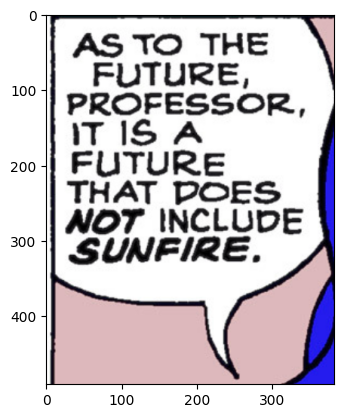

In [68]:
image_path = "C:/Insper/VisComp/bubble_5.png"
img=cv.imread(image_path)
plt.imshow(img)

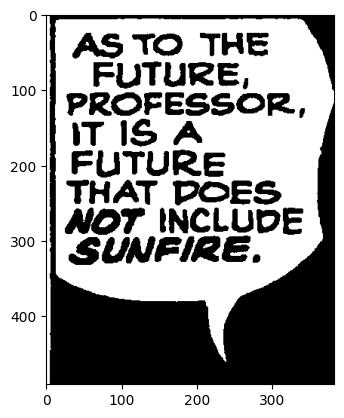

In [69]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
limit1 = (0, 0, 200)
limit2 = (180,20, 255)
mask = cv.inRange(hsv, limit1, limit2)
plt.imshow(mask, cmap='gray')

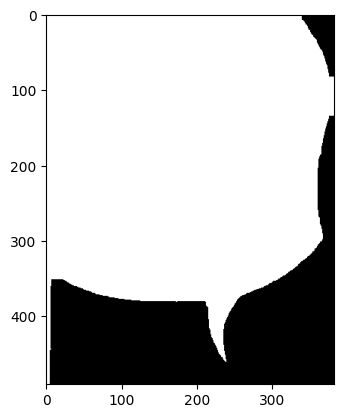

In [70]:
mask=cv.dilate(mask, None, iterations=7)
mask=cv.erode(mask, None, iterations=7)
plt.imshow(mask, cmap='gray')

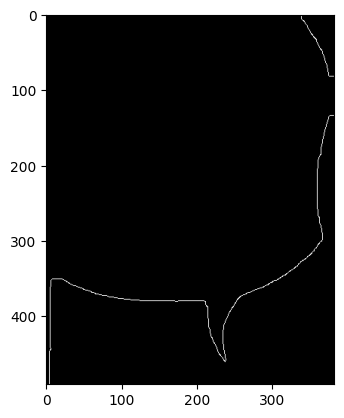

In [71]:
canny = cv.Canny(mask, 100, 200)
plt.imshow(canny, cmap='gray')

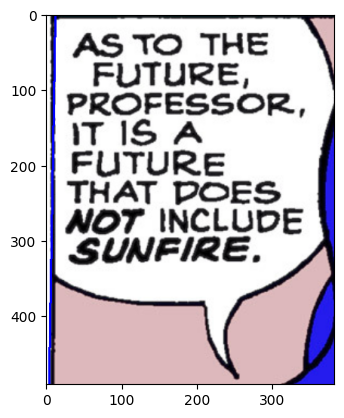

In [79]:
img = cv.imread(image_path)
lines = cv.HoughLines(canny, 1, np.pi/180, threshold=100)

if lines is not None:
    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))

        # Draw lines on the original image
        cv.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.imshow(img)

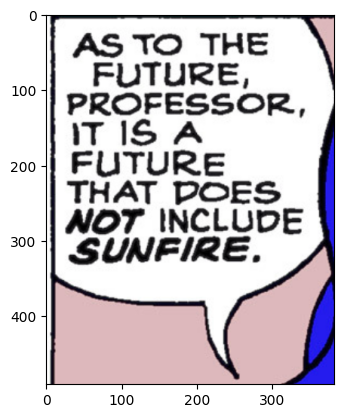

In [73]:
img = cv.imread(image_path)
contours, hierarchy = cv.findContours(mask, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

#get contour with max area
max_area = 0
for contour in contours:
    area = cv.contourArea(contour)
    if area > max_area:
        max_area = area
        max_contour = contour

perimeter = cv.arcLength(max_contour, True)
approx = cv.approxPolyDP(max_contour, 0.05 * perimeter, True)
    
# Check if the contour is approximately rectangular
if len(approx) == 4:
    x, y, w, h = cv.boundingRect(approx)
    aspect_ratio = float(w) / h
        
    # Check aspect ratio to filter out non-rectangular shapes
    if 0.8 <= aspect_ratio <= 1.2:
        # Assume it's a speech bubble
        cv.drawContours(img, [max_contour], -1, (0, 255, 0), 2)

plt.imshow(img)

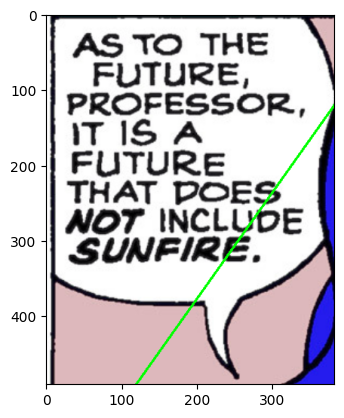

In [74]:
img = cv.imread(image_path)
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv.fitLine(max_contour, cv.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)
plt.imshow(img)

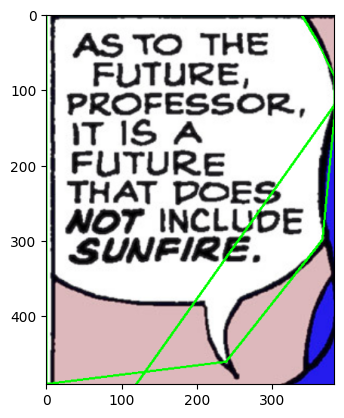

In [75]:
hull = cv.convexHull(max_contour)
cv.drawContours(img, [hull], 0, (0,255,0), 2)
plt.imshow(img)

In [ ]:
# Usar clawler laberer
# Fazer programa para arrastar quadrados em opencv
# Aliar modelo de reconhecimento com modelo de detecção de pessoas
# Procurar o que tem de existente de detecção de rostos/pessoas que funcione para quadrinhos
# Se não tive, seria um processo de treinar 
# Desenhos -> colorizar de maneira realista